# Energy/Eigenvalue Distribution

In [1]:
%matplotlib inline
%cd /home/aditya/Documents/SOMBL
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scripts.plot_utils as putils
sns.set()
sns.set_style("whitegrid")

/home/aditya/Documents/SOMBL


In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
kwargs = {
    "size": 60,
    "coupling": 0.3,
    "disorder": 14,
    "hopup": 1.0,
    "hopdn": 1.0,
    "runs": 100,
    "nospin": False,
    "binnum": None,
    "alpha": None,
    "beta": None,
    "batchsize": 10,
    "batch": None
}



In [4]:
energy_core_min = -8
energy_core_max = 8

In [5]:
prefix = "data/mbl"

for batch in range(kwargs["batchsize"]):
    kwargs["batch"] = batch
    params = putils.SystemParams(**kwargs)
    filename = putils.getFilename(params, endname="_eigvals.dat", prefix=prefix)
    # print(filename)
    eigvals = np.loadtxt(filename)
    fig, ax = plt.subplots(figsize=(5, 5))
    palette = sns.color_palette("Blues")
    kdecolor = palette[3]
    linecolor = palette[5]
    # print(color)
    for i in range(params.batchsize):
        sns.kdeplot(eigvals[i, :], x="Energy", label=f"{i}", fill=True, alpha=1/params.batchsize,
                    color=kdecolor, ax=ax)
        sns.rugplot(eigvals[i, :], x="Energy", label=f"{i}", color=kdecolor, alpha=1/params.batchsize, ax=ax)
    ax.set_xlabel("Energy")
    ax.set_ylabel("Density")
    ax.axvline(energy_core_min, 0, 1, linestyle="--", color=linecolor)
    ax.axvline(energy_core_max, 0, 1, linestyle="--", color=linecolor)
    fig.tight_layout()
    savefilename = putils.getFilename(params, endname="_eigvals_density", prefix="mbl")
    fig.savefig("plots/PDFs/" + savefilename + ".pdf")
    fig.savefig("plots/PNGs/" + savefilename + ".png")
    plt.close(fig)

FileNotFoundError: data/mbl_60x60_W14_C0.3_TU1_TD1_N100_BS10_B0_eigvals.dat not found.

FileNotFoundError: data/eigvals_60x60/mbl_60x60_W14_C0.3_TU1_TD1_N100_BS10_B1_eigvals.dat not found.

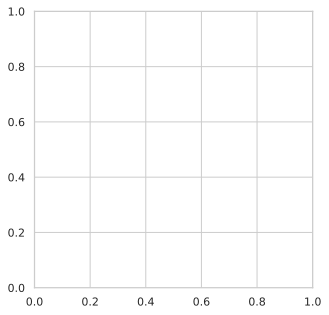

In [6]:
prefix = "data/eigvals_60x60/mbl"
alpha_val = 1 / (params.batchsize * kwargs["batchsize"])
fig, ax = plt.subplots(figsize=(5, 5))

for batch in range(1, kwargs["batchsize"]+1):
    kwargs["batch"] = batch
    params = putils.SystemParams(**kwargs)
    filename = putils.getFilename(params, endname="_eigvals.dat", prefix=prefix)
    # print(filename)
    eigvals = np.loadtxt(filename)
    palette = sns.color_palette("Blues")
    kdecolor = palette[3]
    linecolor = palette[5]
    # print(color)
    for i in range(params.batchsize):
        plt.hist(eigvals[i, :], bins=50, density=True, histtype="step",
                 label=f"{i}", color=kdecolor)
        # sns.histplot(eigvals[i, :], label=f"{i}", fill=True, alpha=alpha_val,
        #             color=kdecolor, ax=ax)
        # sns.rugplot(eigvals[i, :], x="Energy", label=f"{i}", color=kdecolor,
        #             alpha=alpha_val, ax=ax)
ax.set_xlabel("Energy")
ax.set_ylabel("Density")
ax.axvline(energy_core_min, 0, 1, linestyle="--", color=linecolor)
ax.axvline(energy_core_max, 0, 1, linestyle="--", color=linecolor)
fig.tight_layout()
    # savefilename = putils.getFilename(params, endname="_eigvals_density", prefix="mbl")
    # fig.savefig("plots/PDFs/" + savefilename + ".pdf")
    # fig.savefig("plots/PNGs/" + savefilename + ".png")
    # plt.close(fig)
x = np.linspace(-10, 10, 100)
y = -3e-4*(x)**2 + 6.5e-2
ax.plot(x, y, color="red")

In [6]:
prefix = "data/eigvals_60x60/mbl"
alpha_val = 1 / (params.batchsize * kwargs["batchsize"])
fig, ax = plt.subplots(figsize=(5, 5))
bins = np.zeros(50)
bins[1:-1] = np.linspace(energy_core_min, energy_core_max, 50 - 2)
bins[0] = -10
bins[-1] = 10

for batch in range(1, kwargs["batchsize"]+1):
    kwargs["batch"] = batch
    params = putils.SystemParams(**kwargs)
    filename = putils.getFilename(params, endname="_eigvals.dat", prefix=prefix)
    # print(filename)
    eigvals = np.loadtxt(filename)
    palette = sns.color_palette("Blues")
    kdecolor = palette[3]
    linecolor = palette[5]
    # print(color)
    avg_hist = 0
    for i in range(params.batchsize):
        hist, bin_edges = np.histogram(eigvals[i, :], bins=bins, density=True)
        avg_hist += hist
        # plt.hist(eigvals[i, :], bins=50, density=True, histtype="step",
        #          label=f"{i}", color=kdecolor)
        # sns.histplot(eigvals[i, :], label=f"{i}", fill=True, alpha=alpha_val,
        #             color=kdecolor, ax=ax)
        # sns.rugplot(eigvals[i, :], x="Energy", label=f"{i}", color=kdecolor,
        #             alpha=alpha_val, ax=ax)
avg_hist /= params.batchsize
plt.hist(bins[:-1], bins, weights=avg_hist)
ax.set_xlabel("Energy")
ax.set_ylabel("Density")
ax.axvline(energy_core_min, 0, 1, linestyle="--", color=linecolor)
ax.axvline(energy_core_max, 0, 1, linestyle="--", color=linecolor)
fig.tight_layout()

binsize = bins[1] - bins[0]
avg = np.sum((bins[:-1] + bins[1:])/2 * avg_hist)
sigma_sq = np.sum((bins[:-1] + binsize/2)**2 * avg_hist) - avg**2

print(avg, sigma_sq)
    # savefilename = putils.getFilename(params, endname="_eigvals_density", prefix="mbl")
    # fig.savefig("plots/PDFs/" + savefilename + ".pdf")
    # fig.savefig("plots/PNGs/" + savefilename + ".png")
    # plt.close(fig)
x = np.linspace(-10, 10, 100)
# y = -3e-4*(x)**2 + 6.6e-2
# norm = erf(10/sigma_sq**0.5)
norm = (2 * np.pi * sigma_sq)**0.5
y = np.exp(-(x-avg)**2 / (2*sigma_sq)) / norm

ax.plot(x, y, color="red")

NameError: name 'params' is not defined

[[ 2.96670894  0.36685547  0.83297728 ...  9.07461855  0.50801548
   2.5288508 ]
 [ 0.76749159  0.07683213  2.5886504  ...  0.56711045  4.78153072
   1.11088149]
 [ 5.42605042  3.78137422  0.81104179 ... 22.57802827  0.07910395
   7.15193999]
 ...
 [12.11199581  0.08174969  0.74552957 ...  1.1615983   4.27732116
   0.54197803]
 [ 0.38907113  0.17492406  0.64094499 ...  1.81722756  1.59648427
   0.65554226]
 [ 1.20266954  0.53264476  0.11025351 ...  0.09865232 14.62133014
   2.57931402]]


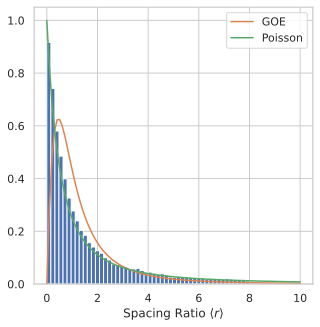

In [6]:
prefix = "/home/aditya/Data/ProjectData/sombl/cluster_density_data_20230115/eigvals_60x60/mbl"
fig, ax = plt.subplots(figsize=(5, 5))

batch = 5
# for batch in range(1, kwargs["batchsize"]+1):
kwargs["batch"] = batch
params = putils.SystemParams(**kwargs)
filename = putils.getFilename(params, endname="_eigvals.dat", prefix=prefix)
eigvals = np.loadtxt(filename)

# Remove the degeneracies
unique_eigvals = eigvals[:, ::2]
spacings = unique_eigvals[:, 1:] - unique_eigvals[:, :-1]
spacings /= np.mean(spacings)
ratios = spacings[:, 1:] / spacings[:, :-1]

print(ratios)

ax.hist(ratios.flatten(), bins=50, range=[0, 8], density=True)
# ax.set_xlim(0, 1e-1)


z_beta = 8/27
beta = 1
r = np.linspace(0, 10, 100)
y = (r + r*r)**beta / (z_beta * (1 + r + r*r)**(1 + 1.5*beta))
ax.plot(r, y, label="GOE")

# z_beta = 4 * np.pi / (81 * np.sqrt(3))
# beta = 2
# r = np.linspace(0, 10, 100)
# y = (r + r*r)**beta / (z_beta * (1 + r + r*r)**(1 + 1.5*beta))
# ax.plot(r, y, label="GUE")

# z_beta = 4 * np.pi / (729 * np.sqrt(3))
# beta = 4
# r = np.linspace(0, 10, 100)
# y = (r + r*r)**beta / (z_beta * (1 + r + r*r)**(1 + 1.5*beta))
# ax.plot(r, y, label="GSE")


r = np.linspace(0, 10, 100)
y = 1/(1 + r)**2
ax.plot(r, y, label="Poisson")

ax.set_xlabel(r"Spacing Ratio $\langle r \rangle$")
ax.legend()

In [ ]:
spacings = energies